In [29]:
import numpy as np
import pandas as pd
import pandas as pd
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv('./train.csv')

In [31]:
df.head()

,Location,Timestamp,out,SBT113,SBT114,SBT123,SBT124,aod,bgrun,blh,...,vddsf,veg,veril,vgtyp,vis,vstm,vucsh,vvcsh,wz,wz_1
0,26001,2023-04-01 00:00:00,0.0,221.470001,252.800003,229.880005,263.500000,0.0,0.0,285.808472,...,0.0,12.1,0.0000,4.0,200.0,-3.735277,2.772049,8.102692,0.004961,0.007971
1,26001,2023-04-01 01:00:00,0.0,217.809998,223.240005,220.789993,232.279999,0.0,0.0,227.448288,...,0.0,12.1,0.0000,4.0,100.0,-2.936327,2.998110,8.959118,0.001984,0.025440
2,26001,2023-04-01 02:00:00,0.0,213.770004,212.880005,214.860001,215.169998,0.0,0.0,270.042694,...,0.0,12.1,0.0216,4.0,100.0,-1.359379,2.562096,10.455593,-0.000540,0.023996
3,26001,2023-04-01 03:00:00,0.0,211.479996,209.869995,212.320007,212.300003,0.0,0.0,336.727722,...,0.0,12.1,0.1520,4.0,100.0,1.500101,1.791159,13.268576,-0.023347,-0.036469
4,26001,2023-04-01 04:00:00,0.0,217.399994,220.169998,220.130005,222.729996,0.0,0.0,312.701141,...,0.0,12.1,0.6144,4.0,200.0,0.950638,6.966200,10.256224,-0.017687,0.007331


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179363 entries, 0 to 179362
Columns: 112 entries, Location to wz_1
dtypes: float64(110), int64(1), object(1)
memory usage: 153.3+ MB


###Using XGBoost Regressor

In [33]:
import pandas as pd
import xgboost as xgb

# Drop non-numeric and irrelevant columns
X = df.drop(columns=["out", "Location", "Timestamp"])
y = df["out"]

from xgboost import XGBRegressor

model = XGBRegressor(
    n_estimators=300,
    max_depth=10,
    learning_rate=0.1,
    tree_method="gpu_hist",
    predictor="gpu_predictor",
    random_state=42,
    n_jobs=-1
)
model.fit(X, y)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [15:56:16] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [15:56:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=-1, num_parallel_tree=None, ...)

In [34]:
# Get feature importances
importances = pd.Series(model.feature_importances_, index=X.columns)

# Select top 20 features
top50 = importances.sort_values(ascending=False).head(50)
print("Top 50 features:\n", top50)

# Correlation with 'out'
top50_features = list(top50.index) + ["out"]
corr = df[top50_features].corr()

/usr/local/lib/python3.12/dist-packages/xgboost/sklearn.py:1479: UserWarning: [15:56:22] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  score = b.get_score(


Top 50 features:
 sh2          0.103800
sulwrf       0.082212
unknown_8    0.068237
cnwat        0.067637
orog         0.048932
sp           0.045471
mstav        0.039285
vucsh        0.038702
fsr          0.037338
lai          0.034663
u            0.033975
mslma        0.019377
sde          0.016282
v10          0.014770
sdwe         0.013675
vvcsh        0.013271
pres_1       0.012872
vgtyp        0.010012
t            0.009817
lcc          0.009530
v            0.009109
cpofp        0.008209
ustm         0.008130
vstm         0.007630
veg          0.007468
max_10si     0.007379
refd         0.007255
tcc_1        0.007115
slhtf        0.007011
sdswrf       0.006662
mdens        0.006616
pwat         0.006286
gh_6         0.006088
gflux        0.006024
gh_7         0.005990
cape_1       0.005961
u10          0.005891
t2m          0.005820
fricv        0.005379
d2m          0.005237
pt           0.005168
unknown_4    0.005049
gust         0.004594
veril        0.004182
gh_4         0

###Visualization

In [37]:
import warnings
warnings.filterwarnings("ignore")

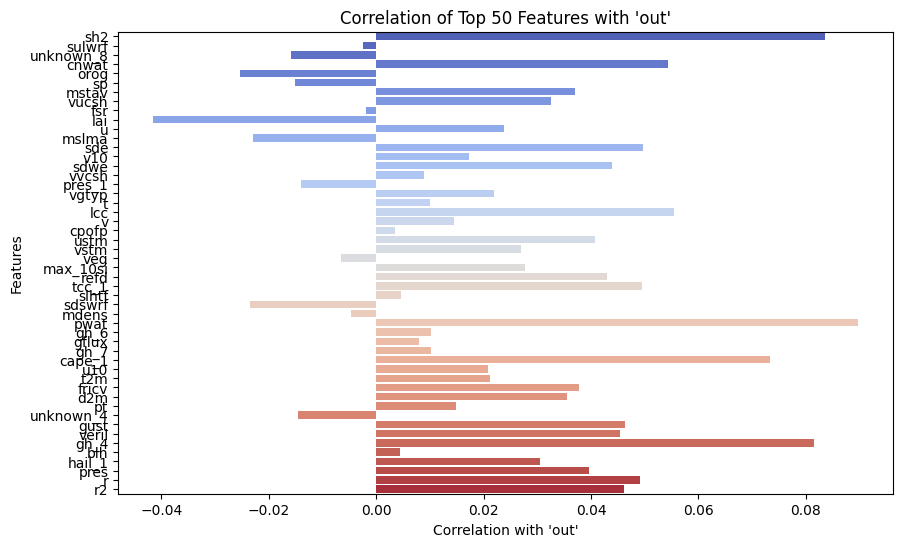

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation of top50 features with out
correlations = df[top50.index.tolist() + ["out"]].corr()["out"].drop("out")

# Bar plot
plt.figure(figsize=(10,6))
sns.barplot(x=correlations.values, y=correlations.index, palette="coolwarm")
plt.title("Correlation of Top 50 Features with 'out'")
plt.xlabel("Correlation with 'out'")
plt.ylabel("Features")
plt.show()


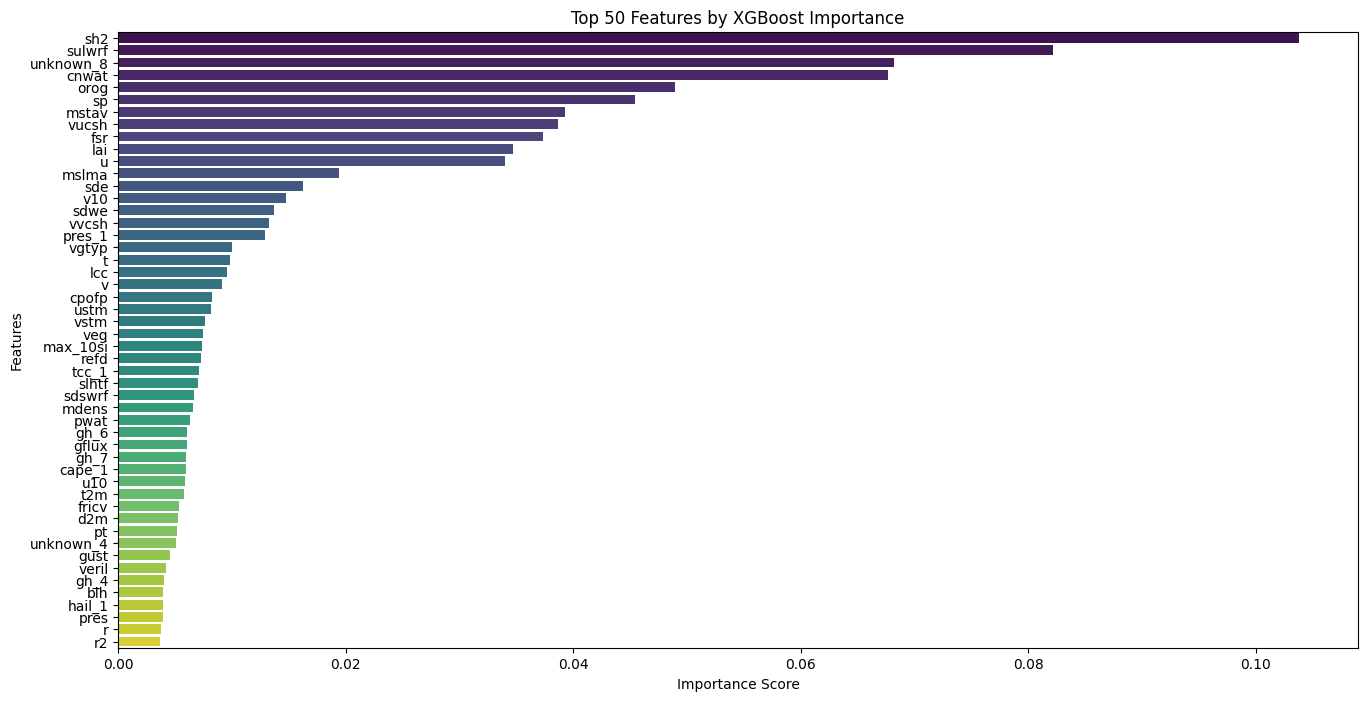

In [39]:
#model driven ranking
plt.figure(figsize=(16,8))
sns.barplot(x=top50.values, y=top50.index, palette="viridis")
plt.title("Top 50 Features by XGBoost Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()